In [3]:
wd <- dirname(dirname(getwd()))
source(paste0(wd,"/mission_control/treasure_map.R"))
library(tidyverse)
library(ggcorrplot)
library(ggpubr)
library(gridExtra)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.1
Warning message:
“package ‘tibble’ was built under R version 3.6.3”Warning message:
“package ‘tidyr’ was built under R version 3.6.3”Warning message:
“package ‘purrr’ was built under R version 3.6.3”Warning message:
“package ‘dplyr’ was built under R version 3.6.3”Warning message:
“package ‘forcats’ was built under R version 3.6.3”── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

### 0 - read prepped data

In [4]:
cpi <- readRDS(paste0(I_DIR, "cpi_go.Rds"))
pred_plts <- readRDS(paste0(FIG_DIR, "pred_study_plots.Rds"))

In [5]:
o_dir <- paste0(FIG_DIR ,"supplement_note/")
get_dressed <- function(go, title = "", hjust = .5, size = 27, vjust = 1, mar = c(0,0,.2,.2)){
    go + ggtitle(title) + theme(plot.title = element_text(hjust = hjust, size = size, vjust = vjust), plot.margin = unit(mar, "cm"))
}
annote <- function( i, lab, size = 25 ) annotate_figure( i, fig.lab = lab, fig.lab.size = size, fig.lab.face = "bold")

### 1 - Latent factors study

In [6]:
pred_sim <- annote(pred_plts$combined$figure_s6b, "A")

##### Correlation plot

In [7]:
base_theme <- theme_classic(base_size = 18) 
cor_theme <- (
    base_theme 
        + theme(plot.margin = unit(rep(0,4), "cm"), 
                plot.title = element_text(hjust = .5), 
                legend.position = "none"
               )
)        

In [17]:
mat <- cpi %>% transmute(
    "TMB" = somatic_TMB,
    "TMB Clonal (AM 1)" = somatic_TMB_clonal, 
    "TMB Exome (AM 2)" = somatic_TMB_exome,
    "T-cell Cluster" = tcell,
    "T-cell Effector Gene Set (AM 1)" = isofox_gene_set_t_cell_effector, 
    "T-cell VHIO (AM 2)" = isofox_gene_set_vhio_tcell,
    "Proliferation Cluster" = prolif,
    "Proliferation Gene Set (AM 1)" = isofox_gene_set_prolif,
    "Cell Cycle (AM 2)" = isofox_gene_set_mariathan_Cell_cycle, 
    "TGFB Cluster" = isofox_gene_set_Pan_TBRS, 
    "Pan-TBRS (AM 1)" = isofox_gene_set_mariathan_EMT2, 
    "EMT2 (AM 2)" = isofox_gene_set_vhio_tgfb,
    "Pretreatment Cluster" = pretreat,
    "Any Pretreatment (AM 1)" = clinical_pre_treated,
    "Sytemic Pretreatment (AM 2)" = clinical_meta_hasSystemicPreTreatment2
)

In [18]:
input <- cor( mat, use = "pairwise.complete.obs")

In [35]:
cor_ready <- annote(ggcorrplot( input[,seq(15,1)],lab = TRUE,tl.cex = 20, lab_size = 6, ggtheme = cor_theme) + ggtitle("Correlations") + theme(plot.title = element_text(hjust = .5, size = 25)), "B")
cor_ready <- as_ggplot(arrangeGrob(cor_ready, layout_matrix = rbind(c(2,1,1,1,1,1,3)))) + theme(plot.margin = unit(c(1.2,1.2,1.2,1.2), "cm"))

#### Together

In [36]:
go <- get_dressed(as_ggplot(arrangeGrob(pred_sim, cor_ready, layout_matrix = cbind(c(1,1,1,2,2,2,2)))), title = "Evaluation of 3 models with different representations of 5 latent factors", vjust = 1) 

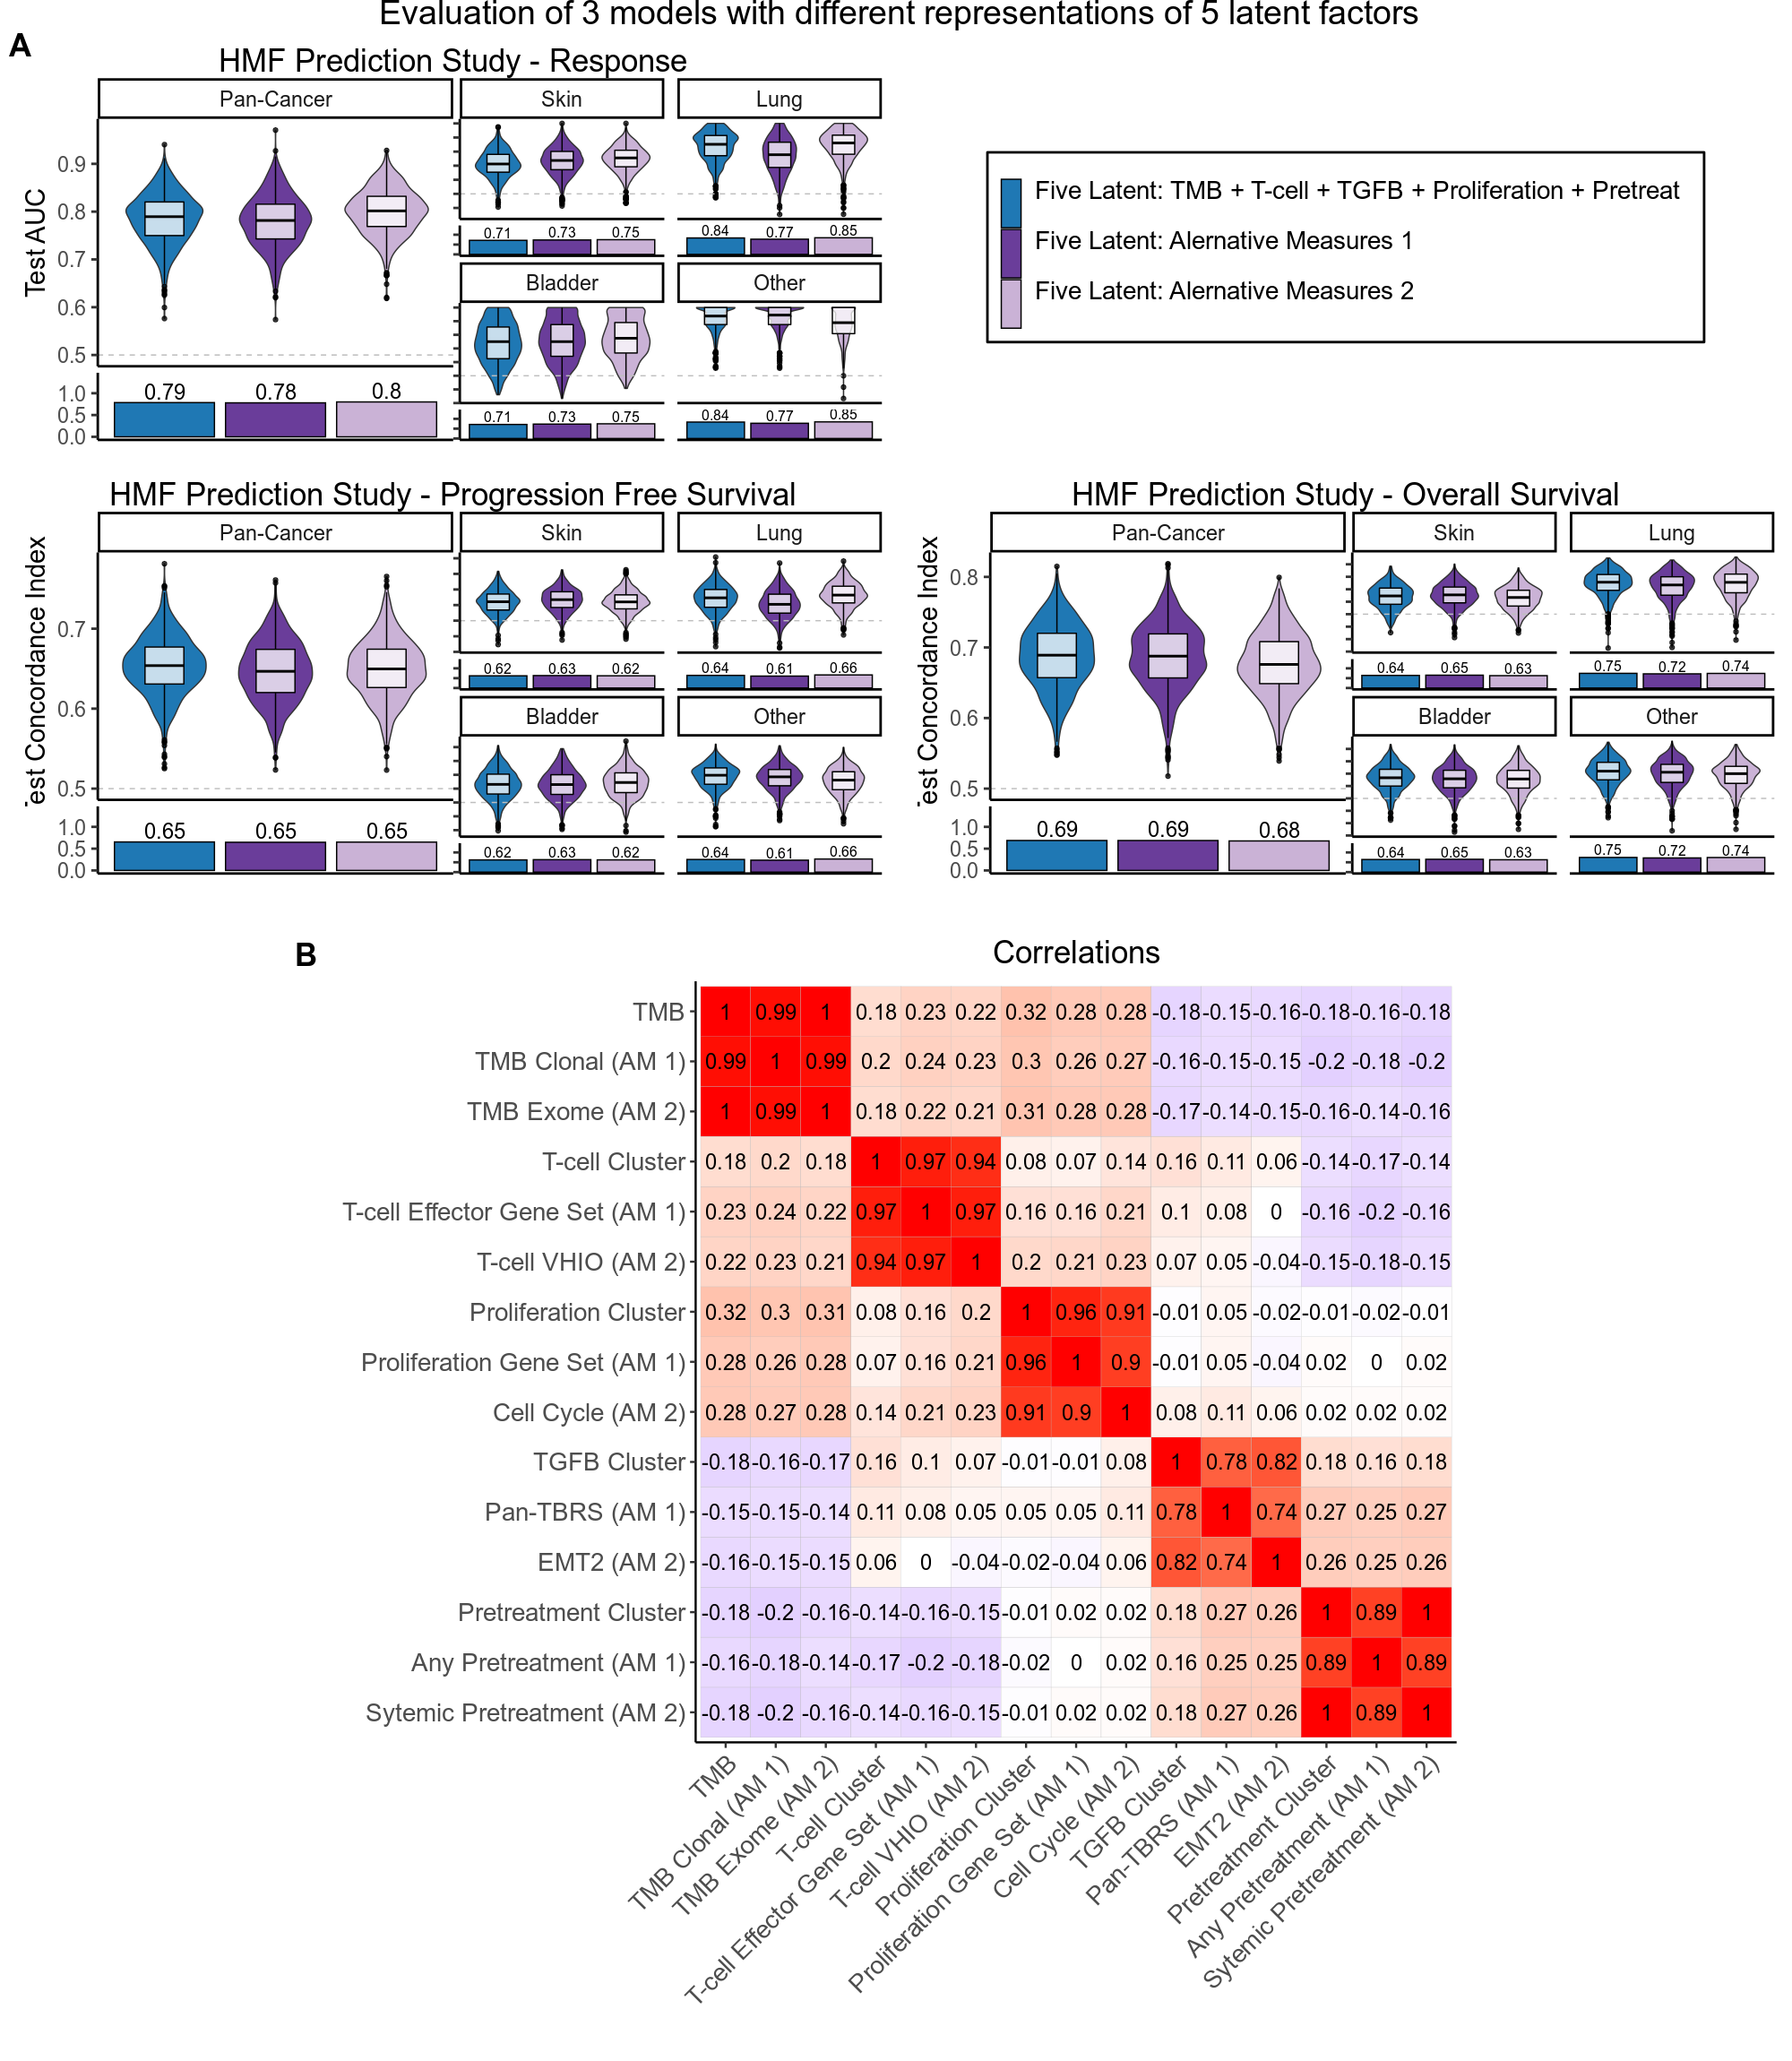

In [37]:
options(repr.plot.width = 20, repr.plot.height = 23, repr.plot.res = 100)
plot(go)
ggsave( paste0(FIG_FINAL_DIR, "0b_supplement_sim_latent.png"), go, width = 20, height = 23)